# 8장 텍스트 분석

* Text Analysis와 NLP : 466쪽 설명을 읽어보자.

    NLP (Natural Language Processing; 자연어처리)
        466쪽 수정 : National => Natural. 

* 텍스트 분석의 영역들

    `텍스트 분류`
    
    `감성 분석`
    
    `텍스트 요약`
    
    `텍스트 군집화`

## 8.1 텍스트 분석의 이해

**1) 피처 벡터화**

* 텍스트 분석이 7장까지 공부한 내용과 다른 점 : <u>텍스트 데이터는 비정형 데이터(unstructured data)</u>이므로 머신러닝 알고리즘을 텍스트 데이터에 적용하기 위해서는 텍스트로부터 변수(feature)들을 추출하고 단어의 빈도처럼 숫자로 된 변수값을 부여해야한다.

* feature vectorization(피처 벡터화), feature extraction(피처 추출) : 텍스트를 벡터로 표현하여 feature를 추출하기.

 벡터 피처화 방법 : **BoW(Bag of Words)**, Word2Vec

**2) 텍스트분석 프로세스**

1. `텍스트 사전 준비작업(전처리)` - <u>텍스트 정규화</u> 

        data cleansing(데이터 클렌징) : 대소문자 변경, 특수문자 삭제
    
        tokenization(단어, 문장 토큰화)
    
        filtering, stop word(의미없는 단어) 제거 
        
        stemming(어근 추출) 
        
        lemmatization(표제어 추출)
        
2. `feature vectorization(extraction)`

        전처리 과정을 통해 가공된 데이터에서 피처 추출, 벡터 값 할당
        
            count 기반 벡터화, TF-IDF 기반 벡터화
            
3. `머신러닝 모델 수립, 학습, 예측, 평가`

**3) 파이썬 기반 NLP, Text Analysis Packages**

* NLTK (Natural Language Toolkit)

    [NLTK documentattion](https://www.nltk.org/), 
    [Wikipedia 기사](https://en.wikipedia.org/wiki/Natural_Language_Toolkit)
    
    
* Gensim

    [Website](https://radimrehurek.com/gensim/),
    [Wikipedia 기사](https://en.wikipedia.org/wiki/Gensim)
    
    
* SpaCy

    [Website](https://spacy.io/),
    [Wikipedia 기사](https://en.wikipedia.org/wiki/SpaCy)
    
교재에서 소개하는 패키지를 포함해서 다른 패키지에 대한 기사들도 찾아보자.(가령 [ITWORLD](https://www.itworld.co.kr/news/187793)) 

* 그런데, 그냥 사이킷런만으로는 텍스트분석을 할 수 없을까? **469쪽** 설명 참조.

사이킷런에 있는 텍스트분석 모듈로는 `sklearn.feature_extraction`이 있다. 이미지와 텍스트에서 특성을 추출할 수 있는데 자세한 내용은 [도움말](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction)을 참고하자.

## 8.2 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### 1)  data cleansing(데이터 클렌징)

불필요한 문자, 기호 등을 제거하는 작업

### 1) Text Tokenization

**토큰화** : 문서로부터 문장을, 문장으로부터 단어를 분리하는 과정

         sentence tokenization(문장 토큰화)
         
         word tokenization(단어 토큰화)

* **문장 토큰화**

아래 코드는 `nltk` 패키지에 있는 **sent_tokenize** 함수를 이용하여 3개의 문장으로 이루어진 문서에서 문장을 분리한다. `문장을 분리하는 기준은 마침표, 줄바꿈표 등`인데 아래 코드에 있는 `nltk.download('punkt')`로 문장 분리에 이용되는 데이터들을 다운로드하여 문장 토큰화에 이용한다.

Ex) 영화 대사 [Matrix](https://www.youtube.com/watch?v=6rrPP-QOF3k) (교재 p. 470)

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore') 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/oiehhun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

`nltk.download()`는 NLTK에서 이용할 각종 데이터를 내려받기 위한 것이다. 어떤 것들을 다운로드할 수 있는지  [목록](https://www.nltk.org/nltk_data/)을 보라.

코드를 실행했을 때 나타나는 메시지가 보기 싫다면,

In [2]:
nltk.download('punkt', quiet = True)

True

**sent_tokenize** 함수를 불러오자.

In [3]:
from nltk import sent_tokenize

In [4]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)

In [5]:
sentences = sent_tokenize(text = text_sample)

In [6]:
print(type(sentences), len(sentences))

<class 'list'> 3


**퀴즈** : 왜 len(sentences)의 값이 3일까?\
: 리스트 형태인 문장에 3개이기 때문에

`sent_tokenize` 함수의 결과는 분리된 문장들로 이루어진 리스트다.

In [7]:
print(sentences)

['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


만약 아래 `text`처럼 문장의 끝을 나타내지 않는 점(`.`)이 들어있다면? 또 소문자로 시작되는 문장이 있다면 어떻게 될까?

In [8]:
text2 = '''Punkt knows that the periods in Mr. Smith and Johann S. Bach
do not mark sentence boundaries.  And sometimes sentences
can start with non-capitalized words.  i is a good variable
name.
'''

In [9]:
sentences2 = sent_tokenize(text = text2)

In [10]:
len(sentences2)

3

In [11]:
print(sentences2)

['Punkt knows that the periods in Mr. Smith and Johann S. Bach\ndo not mark sentence boundaries.', 'And sometimes sentences\ncan start with non-capitalized words.', 'i is a good variable\nname.']


꽤 똑똑하게 문장을 분리해낸다.

* **단어 토큰화**

`nltk`의 **word_tokenize()** 함수를 이용하여 문장 안에 있는 단어를 분리한다.

In [12]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

In [13]:
print(type(words), len(words))

<class 'list'> 15


쉽표, 마침표 등의 문장기호들도 모두 하나의 단어로 취급된다.

In [14]:
print(words)

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


**퀴즈** : 무엇을 기준으로 문장을 단어로 분리하는가? space도 단어로 간주되는가?\
: 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리. 쉽표, 마침표 등의 문장기호들도 모두 하나의 단어로 취급된다. 하지만 space는 단어로 간주되지 않는다.

따로 토큰화하는 대신 간단히 `문장 토큰화, 단어 토큰화를 한꺼번에 수행한 다음 단어를 반환하는 함수` **tokenize_text()**를 정의해두고 이용하자.

In [15]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):    
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [16]:
word_tokens = tokenize_text(text_sample)

In [17]:
print(type(word_tokens), len(word_tokens))

<class 'list'> 3


함수 **tokenize_text()**는 텍스트를 문장으로 분리한 다음 각 문장에서 단어를 분리해서 그 단어들의 리스트(`word_tokens`)를 출력한다. 

**퀴즈** :위의 출력에서 `text_sample`에 들어있는 단어 수가 3이라는 말일까? 

당연히 아니다.

아래에서 보듯 `text_sample`에 함수 **tokenize_text()**를 적용한 결과는 중첩 리스트다. 

In [18]:
print(word_tokens)

[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


`word_tokens`에 들어있는 세 리스트(즉 세 개의 sentence)에 단어가 몇 개씩 있는지 알아보자.

In [19]:
[len(sent) for sent in word_tokens]

[15, 12, 18]

한번 더 연습해보자. [Wikipedia의 경성대 기사](https://en.wikipedia.org/wiki/Kyungsung_University) 앞부분이다.

In [20]:
ksu = """
Kyungsung University is a private university in Busan, South Korea. 
It is located in the district of Nam-gu, southwest of the famous Haeundae beach. 
The campus is located near Kyungsung University-Pukyong National University Station on Line 2. 
The university was established by the late Reverend Dr. Kim Gil-Chang, a pioneer of Christianity 
in Korea. 
The university was originally called Kyungnam Teacher's College and established in 1955 
under the ideals of Christian love and service, In 1979 the school was re-organized 
and renamed Pusan Industrial University. At the time of the founding of Pusan Industrial University, 
the General Construction Committee began work on expanding and improving the quality of 
the university's 
facilities. 
As a result, the university received official sanctioning as a general university in September, 1983.
"""

아래와 같이 `wikipedia` 패키지를 설치하고 기사를 불러도 된다.

In [21]:
!pip install wikipedia

In [21]:
import wikipedia
ksu_wiki = wikipedia.page("Kyungsung University")
ksu_text = ksu_wiki.content
ksu_text

"Kyungsung University is a private university in Busan, South Korea.  It is located in the district of Nam-gu, southwest of the famous Haeundae beach.  The campus is located near Kyungsung University-Pukyong National University Station on Line 2.\nThe university was established by the late Reverend Dr. Kim Gil-Chang, a pioneer of Christianity in Korea. The university was originally called Kyungnam Teacher's College and established in 1955 under the ideals of Christian love and service, In 1979 the school was re-organized and renamed Pusan Industrial University. At the time of the founding of Pusan Industrial University, the General Construction Committee began work on expanding and improving the quality of the university's facilities. As a result, the university received official sanctioning as a general university in September, 1983.\nThe name of the university was changed to Kyungsung University in 1988 during the process of becoming an international university which can fulfill the 

첫 두 단락만 고르면 되겠다.

In [22]:
text = ksu_text.split("\n")
text[:2]

['Kyungsung University is a private university in Busan, South Korea.  It is located in the district of Nam-gu, southwest of the famous Haeundae beach.  The campus is located near Kyungsung University-Pukyong National University Station on Line 2.',
 "The university was established by the late Reverend Dr. Kim Gil-Chang, a pioneer of Christianity in Korea. The university was originally called Kyungnam Teacher's College and established in 1955 under the ideals of Christian love and service, In 1979 the school was re-organized and renamed Pusan Industrial University. At the time of the founding of Pusan Industrial University, the General Construction Committee began work on expanding and improving the quality of the university's facilities. As a result, the university received official sanctioning as a general university in September, 1983."]

위의 `ksu`와 같게 하나의 문자열로 만들려면 아래와 같이 리스트의 항목들을 결합하면 된다.

In [23]:
text2 = ",".join(text[:2])
text2

"Kyungsung University is a private university in Busan, South Korea.  It is located in the district of Nam-gu, southwest of the famous Haeundae beach.  The campus is located near Kyungsung University-Pukyong National University Station on Line 2.,The university was established by the late Reverend Dr. Kim Gil-Chang, a pioneer of Christianity in Korea. The university was originally called Kyungnam Teacher's College and established in 1955 under the ideals of Christian love and service, In 1979 the school was re-organized and renamed Pusan Industrial University. At the time of the founding of Pusan Industrial University, the General Construction Committee began work on expanding and improving the quality of the university's facilities. As a result, the university received official sanctioning as a general university in September, 1983."

이제 다음을 연습해보자.

1) 문장토큰화

2) 마지막 문장 단어토큰화

In [24]:
s_ksu = sent_tokenize(text = ksu)

In [25]:
s_ksu

['\nKyungsung University is a private university in Busan, South Korea.',
 'It is located in the district of Nam-gu, southwest of the famous Haeundae beach.',
 'The campus is located near Kyungsung University-Pukyong National University Station on Line 2.',
 'The university was established by the late Reverend Dr. Kim Gil-Chang, a pioneer of Christianity \nin Korea.',
 "The university was originally called Kyungnam Teacher's College and established in 1955 \nunder the ideals of Christian love and service, In 1979 the school was re-organized \nand renamed Pusan Industrial University.",
 "At the time of the founding of Pusan Industrial University, \nthe General Construction Committee began work on expanding and improving the quality of \nthe university's \nfacilities.",
 'As a result, the university received official sanctioning as a general university in September, 1983.']

In [26]:
len(s_ksu)

7

맨마지막 문장(7번째 문장)의 단어 수를 알아보자.

In [27]:
s7 = s_ksu[6]
words7 = word_tokenize(s7)
len(words7)

18

In [28]:
words7

['As',
 'a',
 'result',
 ',',
 'the',
 'university',
 'received',
 'official',
 'sanctioning',
 'as',
 'a',
 'general',
 'university',
 'in',
 'September',
 ',',
 '1983',
 '.']

7개 문장 각각의 단어 수도 알아보자.

In [29]:
word_tokens_ksu = tokenize_text(ksu)

In [30]:
[len(sent) for sent in word_tokens_ksu]

[12, 16, 14, 19, 34, 29, 18]

한글 문장도 잘 될까? (출처: 11/12 경대전)

In [31]:
경대전 = """부산대학교 예술문화영상학과 재학생입니다. 이번학기 저희과에서 영화촬영이 있는데 
간단하게 여자친구 역할 해주실분을 찾고 있어서요..!
경성대 연영과이시면 좋을 것 같습니다! 대사는 없는데 살짝 소리지르는 
감정연기는 있을 것 같아요. 촬영시간은 1시간 내외이고 페이는 따로 드립니다. 🙂 촬영 
날짜는 11월 13일 토요일입니다"""

In [32]:
경대전

'부산대학교 예술문화영상학과 재학생입니다. 이번학기 저희과에서 영화촬영이 있는데 \n간단하게 여자친구 역할 해주실분을 찾고 있어서요..!\n경성대 연영과이시면 좋을 것 같습니다! 대사는 없는데 살짝 소리지르는 \n감정연기는 있을 것 같아요. 촬영시간은 1시간 내외이고 페이는 따로 드립니다. 🙂 촬영 \n날짜는 11월 13일 토요일입니다'

In [33]:
sentences_kdj = sent_tokenize(text = 경대전)
sentences_kdj

['부산대학교 예술문화영상학과 재학생입니다.',
 '이번학기 저희과에서 영화촬영이 있는데 \n간단하게 여자친구 역할 해주실분을 찾고 있어서요..!',
 '경성대 연영과이시면 좋을 것 같습니다!',
 '대사는 없는데 살짝 소리지르는 \n감정연기는 있을 것 같아요.',
 '촬영시간은 1시간 내외이고 페이는 따로 드립니다.',
 '🙂 촬영 \n날짜는 11월 13일 토요일입니다']

In [34]:
len(sentences_kdj)

6

In [35]:
word_tokens_kdj = tokenize_text(경대전)
[len(sent) for sent in word_tokens_kdj]

[4, 12, 6, 9, 7, 6]

* `toy cat`과 `cat toy`

이런 방식으로 `toy cat`과 `cat toy`가 문장에 들어있을 때 그 둘이 갖는 전혀 다른 문맥상의 의미(즉 장난감 고양이와 고양이가 갖고 노는 장난감) 차이를 파악할 수 있을까? '데이터 과학'과 '과학 데이터'의 차이는?

단어 토큰화와 문장의 문맥, 그리고 `n-gram`에 대해서는 **472쪽** 설명을 보자. 위와 같이 개별 단어로 토큰화한 것은 1-gram 또는 unigram이라 부르고 두개씩 단위로 토큰화한 것은 2-gram 또는 bigram이라 부른다.

### 3) 불용어(Stopwords) 제거

텍스트분석에서 중요하지 않은 단어들(가령 영어의 관사와 전치사, be 동사, 조동사 등)은 문법적으로는 필수적이지만 내용은 없는 것들이므로 제외한다. 이런 단어들을 그냥 두면 빈도가 높으므로 자칫 중요 단어로 취급될 수 있다. NLTK에서 정해둔 영어 stopwords의 목록을 아래와 같이 `nltk.corpus.stopwords.words('english')`로 다운로드할 수 있다. 

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oiehhun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

코드를 실행했을 때 나타나는 메시지가 보기 싫다면,

In [37]:
nltk.download('stopwords', quiet = True)

True

In [38]:
stopwords = nltk.corpus.stopwords.words('english')

NLTK에서 정해둔 영어 불용어의 수는?

In [39]:
len(stopwords)

179

영어 불용어 첫 스무 개와 마지막 스무 개를 보자.

In [40]:
print(stopwords[:20])
print()
print(stopwords[-20:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']

["isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords 전체를 보려면

In [41]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**퀴즈** 영어 불용어들은 주로 어떤 품사에 속하는가?\
: 영어의 관사와 전치사, be 동사, 조동사

NLTK는 영어 단어 가운데 179개를 stopwords로 정해 두었다. 

어떤 문서가 있을 때 먼저 `nltk`의 `word_tokenize, sent_tokenize`를 이용하여 단어 토큰화를 실행한 다음 그 결과에 대해 stopwords를 제거한다. 간단히 하나의 문장에 대해 stopwords를 제거하는 코드를 보자. 

In [42]:
example = "NLTK is a leading platform for building Python programs to work with human language data."
wd_tokens = word_tokenize(example)
print(wd_tokens)

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.']


In [43]:
len(wd_tokens)

16

stopwords를 제거하기 전, `example`에 들어있는 단어 수는 16개다. 반복문을 이용해서 불용어가 아닌 것만 골라내자.

In [44]:
result = []
for w in wd_tokens: 
    if w not in stopwords:  # 불용어가 아닌 것들만
        result.append(w)  # .append() : 리스트의 맨마지막 부분에 붙혀준다. result에는 아무것도 없기 때문에 그냥 추가한 것이다.
print(result)

['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.']


In [45]:
len(result)

11

처음에 16개로 이루어진 단어목록 `wd_tokens`에서 stopwords를 제거하고 나니 11개만 남았다. 어떤 것들이 제거되었는지 확인해보자. 맨끝에 있는 마침표는 어떻게 되었는가?\
마침표는 제거되지 않았다.

이제 교재에서 예제로 이용한 3개의 문장별로 얻은 리스트 `word_tokens`에서 stopwords를 제거해보자.

In [46]:
print(word_tokens)

[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


먼저 모든 문자를 모두 소문자로 바꾼 다음, 반복문을 이용하여 불용어를 제거하자.

In [47]:
import nltk

all_tokens = []
# 위에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = [] 
# 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문    
    for word in sentence:
        word = word.lower() #소문자로 모두 변환

        if word not in stopwords:  #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [48]:
[len(sent) for sent in all_tokens]

[8, 4, 9]

stopwords를 제거한 결과 원래 `[15, 12, 18]`개가 `[8, 4, 9]`개로 바뀌었다.

마지막 문장에는 'go'라는 단어가 두 번 들어있다. 잘못된 건 아닐까? 

`단어 토큰화는 문장에 나오는 단어의 단순 목록이 아님을 기억하자. 어떤 단어가 문장 속에 들어있는지 여부도 중요하지만 단어가 나오는 빈도도 중요하다.`

* 한글 문장에서는 어떤 것들이 stopwords에 들어갈까?

[참고](https://www.ranks.nl/stopwords/korean)

* 잠깐, 교재에는 없지만 위키피디아의 경성대 기사를 가지고 단어구름도 그려보자. `wordcloud` 패키지를 설치하고 `matplotlib`를 이용해서 간단히 그릴 수 있다.

In [50]:
!pip install wordcloud

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [50]:
st = set(STOPWORDS)

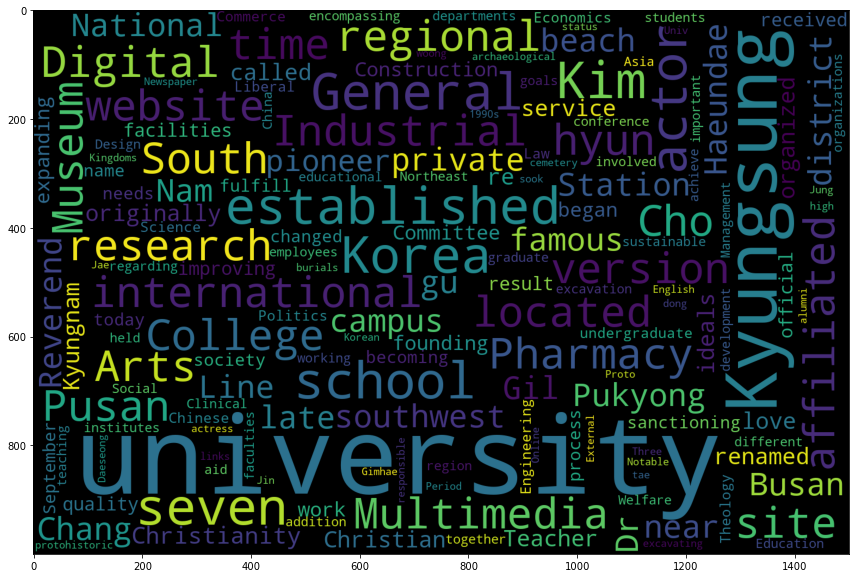

In [51]:
wc = WordCloud(width = 1500, height = 1000, stopwords = st).generate(ksu_text)
plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.show()

### 4) Stemming과 Lemmatization

영어의 경우 명사, 형용사, 동사 단어의 기본형이 단수/복수, 비교급/최상급, 동사의 시제/인칭 등에 따라 다른 단어로 바뀐다. 즉 어미 변화로 인해 하나의 단어가 다른 단어들로 잘못 인식될 수도 있다. 그럴 경우 **어근추출 (stemming)**과 **표제어 추출 (lemmatization)**은 단어의 원형을 찾아준다. `두 방법 가운데 lemmatization이 더 정확한 편이다`('lemmatize'라는 단어의 뜻은? [네이버사전](https://en.dict.naver.com/#/entry/enko/76fe66694f4243e7b8198a651dee373d).

여기서 '표제어'란 사전에서 단어를 찾을 때 이용하는 단어를 말한다. 가령 'am, are, is, being, ...' 등의 단어는 'be'라는 표제어로 찾아야한다.

NLTK에서 제공하는 **stemmer**로는 `Porter, Lancaster, Snowball` 등이 있다. 또한 **lemmatization**를 위해서는 `WordNetLemmatizer`가 있다. 

먼저 `LancasterStemmer`부터 살펴보자. `nltk.stem` 모듈 안에 있다. 

In [52]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

어미 변화된 네 단어의 어근(work, amuse, happy, fancy)를 `LancasterStemmer`가 잘 찾아내는지 알아보자.

In [53]:
print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


제대로 된 것은 'work'하나 뿐이다. `PorterStemmer`로도 시도해보자.

In [54]:
from nltk.stem import PorterStemmer
stemmer2 = PorterStemmer()

In [55]:
print(stemmer2.stem('working'), stemmer2.stem('works'), stemmer2.stem('worked'))
print(stemmer2.stem('amusing'), stemmer2.stem('amuses'), stemmer2.stem('amused'))
print(stemmer2.stem('happier'), stemmer2.stem('happiest'))
print(stemmer2.stem('fancier'), stemmer2.stem('fanciest'))

work work work
amus amus amus
happier happiest
fancier fanciest


`SnowballStemmer`는 어떨까?

In [56]:
from nltk.stem import SnowballStemmer
stemmer3 = SnowballStemmer("english")

print(stemmer3.stem('working'), stemmer3.stem('works'), stemmer3.stem('worked'))
print(stemmer3.stem('amusing'), stemmer3.stem('amuses'), stemmer3.stem('amused'))
print(stemmer3.stem('happier'), stemmer3.stem('happiest'))
print(stemmer3.stem('fancier'), stemmer3.stem('fanciest'))

work work work
amus amus amus
happier happiest
fancier fanciest


위의 결과가 모두 만족스러운가? 제대로 된 것은 역시 하나뿐이다.

아래 `WordNetLemmatizer`의 결과와 비교해보자.

In [57]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet', quiet = True)

In [58]:
nltk.download('wordnet', quiet = True)

True

In [59]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing'),lemma.lemmatize('amuses'),lemma.lemmatize('amused'))
print(lemma.lemmatize('happier'),lemma.lemmatize('happiest'))
print(lemma.lemmatize('fancier'),lemma.lemmatize('fanciest'))

amusing amuses amused
happier happiest
fancier fanciest


만족스러운가? ` WordNetLemmatizer()`는 아무 것도 하지 않았다. 

아래와 같이 `단어의 품사를 추가`해보자.

In [60]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


`시간은 더 많이 걸리지만 Stemmer보다 Lemmatizer가 더 낫다.`

'caring'이라는 단어를 LacncasterStemmer와 WordNetLemmatizer로 처리한 아래 결과를 비교해보라.

In [61]:
print(stemmer.stem('caring'), lemma.lemmatize('caring'), 
      lemma.lemmatize('caring', 'v'), lemma.lemmatize('caring', 'n'))

car caring care caring


하나 더.

In [62]:
print(stemmer.stem('news'), stemmer2.stem('news'), lemma.lemmatize('news', 'n'))

new news news


## 8.3 Bag of Words – BOW

* BoW란? 교재 476쪽 설명을 보자. 이 방법은 `텍스트 안에 있는 단어의 순서나 문맥, 문법 등은 무시하고 단순히 단어의 빈도만으로 feature를 추출하는 모델`이다. 즉 `한 문장 안에 있는 모든 단어들의 목록(단어 하나하나가 각각 행렬의 컬럼, 즉 feature가 된다)을 만들고 그 단어들의 빈도`를 헤아리기만 하면 된다.

교재 476-7의 두 문장 예를 보고 연습하자. 

BoW는 단순한 아이디어에 바탕을 둔 만큼 쉽고 빠르게 모델을 만들 수 있다. 하지만 477쪽의 지적과 같이 단점도 갖고있다.

###  1) BoW 피처 벡터화

우리는 어떤 문서에 자주 나오는 단어들을 분석해서 그 문서의 특성을 파악하려고 한다.

M개의 텍스트 문서가 있고 그 문서들에 나오는 모든 단어의 수가 N개라고 하자. 각 단어가 문서에서 나타나는 빈도를 하나의 컬럼(feature)로 만들면 $M \times N$ 행렬을 얻게 된다(478쪽 그림 참조).  

* 두가지 BoW feature vector화 방식  

     **count 기반 벡터화**
        
     **TF-IDF(term frequency- inverse document frequency) 벡터화**
        
두 방식의 차이점에 대해서는 478-9쪽의 설명을 잘 읽어보자.

조금 더 자세한 내용은 Wikipedia의 [TF-IDF에 대한 설명](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)을 보자.

### 2) 사이킷런의 `CountVectorizer, TfidfVectorier`

* 사이킷런의 `CountVectorizer`

        할 수 있는 작업 : 소문자 변환, 토큰화, stopwords filtering, 피처 벡터화.

        할수 없는 작업 : stemming, lemmatization
        
`CountVectorizer`에서 이용할 수 있는 parameter들에 대해서는 **480쪽** 설명을 참조할 것.       
        
 * 사이킷런의 `TfidfVectorier` : 위와 유사함.  
 
* 사례는 8.4절에서 보자. 

### 3) 희소 행렬 - COO 형식

[sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) : 희소행렬, 희박행렬

COO(coorinate), CSR(compressed sparse row)은 적은 메모리 공간에 저장할 수 있도록 희소행렬을 변환하는 두 가지 방법이다. 이런 방법을 이용하면 저장공간도 절약하고 처리 속도도 높일 수 있는데 둘 가운데 CSR이 더 낫다. 

먼저 희소행렬은 아니지만 간단한 행렬을 이용해서 두 방법의 아이디어를 알아보자.

In [63]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])
dense

array([[3, 0, 1],
       [0, 2, 0]])

[사이파이](https://scipy.org/) 패키지에서 `sparse`를 부르자.

In [64]:
from scipy.sparse import coo_matrix

위의 `dense` 데이터에서 0 이 아닌 데이터만 골라서 `data`에 넣어두자.

**행의 순서대로 데이터를 불러온다.**

In [65]:
data = np.array([3, 1, 2])

3, 1, 2 세 숫자가 들어있는 행과 열의 위치를 각각 array로 만들자. 가령 `3은 (0, 0)에 있고 1은 (0, 2)에, 2는 (1, 1)에 있다.`

In [66]:
row_pos = np.array([0, 0, 1]) #행
col_pos = np.array([0, 2, 1]) #열

`sparse` 모듈의 **coo_matrix()**를 이용하면 행렬에서 0이 아닌 세 값(3, 1, 2)과 그 값들의 위치만으로 원래 행렬 `dense`를 만들어낼 수 있다.

**sparse.coo_matrix()**를 이용하면 `dense` 행렬에서 0이 아닌 세 값(3, 1, 2)과 그 값들의 위치만으로 원래 행렬 `dense`를 만들어낼 수 있다. 

In [67]:
sparse_coo = coo_matrix((data, (row_pos, col_pos)))

`coo_matrix()`의 실행 결과로 바로 행렬이 나오지는 않지만, **toarray()** 메서드를 이용해서 행렬로 표현하면 된다.

In [68]:
sparse_coo 

<2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in COOrdinate format>

해석 : 2행 3열, 0이 아닌 원소들이 3개 있다.

In [69]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

한번 더 연습해보자.

In [70]:
row  = np.array([0, 3, 1, 0])
col  = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])

In [71]:
coo_matrix((data, (row, col)), shape = (4, 4)).toarray()

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

또다른 예도 보자.

In [72]:
row  = np.array([0, 0, 1, 3, 1, 0, 0])
col  = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
coo = coo_matrix((data, (row, col)), shape = (4, 4))

**퀴즈** : 아래 결과를 예측해보라. 0이 아닌 원소가 몇 개일까?

In [73]:
coo.toarray()

array([[3, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

### 4) 희소 행렬 – CSR 형식

아래와 같은 행렬이 있다고 하자.

In [74]:
dense2 = np.array([[0, 0, 1, 0, 0, 5], 
             [1, 4, 0, 3, 2, 5], 
             [0, 6, 0, 3, 0, 0], 
             [2, 0, 0, 0, 0, 0], 
             [0, 0, 0, 7, 0, 8], 
             [1, 0, 0, 0, 0, 0]])

COO 형식을 이용한다면, 0 이 아닌 데이터를 모두 추출하고 그 값들의 행과 열의 위치를 배열로 만들어서 COO 형식으로 변환할 것이다.

In [75]:
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
sparse_coo = coo_matrix((data2, (row_pos,col_pos)))

In [76]:
sparse_coo.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

일단 **csr_matrix()**역시 위와 같은 입력을 받아들이므로 아래와 같이 해도 결과는 마찬가지다.

In [77]:
from scipy.sparse import csr_matrix

In [78]:
csr_matrix((data2, (row_pos, col_pos))).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

CSR 방식은 COO보다 더 경제적이다. 위의 예를 다시 이용해서 알아보자. 

CSR 방식은 다르다. 먼저 행 위치 배열(위에서 `row_pos`)에서 새로운 값이 시작되는 위치를 배열로 만든다.

`row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])`

행 위치를 나타내는 이 배열(`row_pos`)에서는 같은 값이 연속적으로 반복해서 나온다. 살펴보면 0이 두번, 1은 5번, 2는 두번, 4도 두번 연속해서 나온다. 모든 행의 위치대신 새로운 값이 시작되는 위치만 배열로 만들면 더 경제적이겠다. 

위의 경우 새로운 값은 0, 2, 7, 9, 10, 12번째 행에 나온다. 맨 끝에 0이 아닌 항목의 갯수를 추가해서 이것만 배열로 만들자.

In [79]:
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

CSR 방식은 0이 아닌 데이터 값, 그 데이터가 처음 나타나는 행의 index, 그리고 그 값의 열 index를 이용한다.

`csr_matrix()`의 괄호 속에 항목들이 입력되는 모양을 잘 비교해보라.

In [80]:
sparse_csr = csr_matrix((data2, col_pos, row_pos_ind))

print(sparse_csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


COO형식 행렬을 CSR 형식으로 바꿀 수도 있다.

In [81]:
csr_matrix(sparse_coo).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

**퀴즈** 아래 행렬이 출력으로 나오도록 `cols`와 `ind`를 적어보시오.

     array([[0, 5, 1],
           [0, 3, 0],
           [4, 1, 6]])

In [ ]:
ind = np.array(         )
cols = np.array(          )
data = np.array([5, 1, 3, 4, 1, 6])
csr_matrix((data, cols, ind)).toarray()

위의 정답은 아래

In [82]:
ind = np.array([0, 2, 3, 6])
cols = np.array([1, 2, 1, 0, 1, 2])
data = np.array([5, 1, 3, 4, 1, 6])
csr_matrix((data, cols, ind)).toarray()

array([[0, 5, 1],
       [0, 3, 0],
       [4, 1, 6]])

앞에서 우리는 간단한 행렬 `dnese, dense1`이 주어졌을 때 그 행렬에서 0이 아닌 원소들(`data`)을 찾고 그 원소들의 위치를 찾아서 `coo_matrix(), csr_matrix()` 함수를 연습했다. 이 함수들의 용도는 규모가 큰 희소행렬을 효율적으로 저장해서 빠르게 처리하는 것이므로 현실적으로 그런 작업은 할 필요없다. 

**coo_matrix()**, **csr_matrix()** 함수의 일반적인 용도는 `괄호 속에 행렬 하나만 입력하면 그 행렬에서 0이 아닌 원소들을 찾고 그 원소들의 위치를 저장하는 것이다.` 아래 행렬로 연습해보자.

In [83]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = coo_matrix(dense3)

이렇게 만든 `coo`에는 원래 행렬을 만들 수 있는 모든 정보가 다 들어있다.

In [84]:
coo

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in COOrdinate format>

36개 원소 중에 0이 아닌 것이 13개 있고 그 값과 위치를 COO 형식으로 저장하여 `coo`에 담아두었다는 말이다.

In [85]:
coo.shape

(6, 6)

행렬 `dense3`에 있는 0이 아닌 원소들과 그 갯수는 아래와 같이 확인할 수 있다.

In [86]:
coo.data  #0이 아닌 원소들

array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

In [87]:
len(coo.data)

13

In [88]:
coo.nnz  #0이 아닌 원소들의 갯수

13

행렬 `dense3`에 있는 0이 아닌 원소들의 행 index와 열 index는 아래와 같이 확인하자.

In [89]:
coo.row  #0이 아닌 원소들의 행 index

array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5], dtype=int32)

In [90]:
coo.col  #0이 아닌 원소들의 열 index

array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0], dtype=int32)

In [91]:
coo.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

이번에는 `csr_matrix()` 함수를 연습하자.

In [92]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

csr = csr_matrix(dense3)

In [93]:
csr.shape

(6, 6)

In [94]:
csr.data  #0이 아닌 원소들

array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

In [95]:
csr.indices  #0이 아닌 원소들의 열 index

array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0], dtype=int32)

In [96]:
csr.indptr  # 반복될때 새로운값이 나올때의 index

array([ 0,  2,  7,  9, 10, 12, 13], dtype=int32)

In [97]:
csr.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

**퀴즈** : `coo.row`와 `csr.indptr`의 관계를 설명하시오.

coo.row는 0이 아닌 원소들의 행 index이고, csr.indptr은 그 행 index가 반복될때 새로운값이 나올때의 index이다.

In [98]:
coo.row

array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5], dtype=int32)

In [99]:
csr.indptr

array([ 0,  2,  7,  9, 10, 12, 13], dtype=int32)

또, `coo.col`과 `csr.indices`의 관계는?

: 둘다 0이 아닌 원소들의 열 index이므로 똑같다.

In [100]:
coo.col

array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0], dtype=int32)

In [101]:
csr.indices

array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0], dtype=int32)

사이킷런의 `CountVectorizer, TfidfVectorizer`로 변환한 결과는 CSR 형식의 희소행렬이다.

`coo_matrix()`, `csr_matrix()` 함수를 이용하면 위에서 한 모든 데이터가 들어있다.\
`.data` : 0이 아닌 원소들\
`.row` : 행 위치 번호\
`.col` : 열 위치 번호\
`.indptr` : 반복될때 새로운값이 나올때의 인덱스\
`.indices` : 열 위치 번호

**문제훈 질문(211203)**

In [105]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

In [106]:
d = np.array([[1,0,2],[0,0,0],[0,0,3]])
d

array([[1, 0, 2],
       [0, 0, 0],
       [0, 0, 3]])

In [107]:
r = np.array([0,0,1,2])
c = np.array([0,2,1,2])
rp = np.array([0,2,3,4])
data = np.array([1,2,1,3])
csr_matrix((data, c, rp)).toarray()

array([[1, 0, 2],
       [0, 1, 0],
       [0, 0, 3]])

In [108]:
r=np.array([0,0,2])
c=np.array([0,2,2])
data11=np.array([1,2,3])
coom=coo_matrix((data11, (r,c)))
print(coom.toarray())

[[1 0 2]
 [0 0 0]
 [0 0 3]]


In [109]:
r_p2=np.array([0,2,3])
c_p2=np.array([0,2,2])
data112=np.array([1,2,3])
csr_matrix((data112, c_p2, r_p2), shape=(2,3)).toarray()

array([[1, 0, 2],
       [0, 0, 3]])

In [110]:
r_p=np.array([0,2,2,3])
c_p=np.array([0,2,2])
data12=np.array([1,2,3])
csr_matrix((data12, c_p, r_p)).toarray()

array([[1, 0, 2],
       [0, 0, 0],
       [0, 0, 3]])

## 8.4 텍스트 분류 실습: 20 뉴스그룹 분류

뉴스기사 내용을 보고 그 기사가 어떤 뉴스 그룹에 속하는지 분류해보자.

데이터 소개는 487쪽에 있는데 데이터를 분석하기에 충분하지 못하다. 사이킷런의 [설명서](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html?highlight=fetch_20newsgroups)를 보자.

설명을 보면 데이터는 총 18,846개인데 `sklearn.datasets.fetch_20newsgroups()`으로 데이터를 다운로드할  수 있다. 

이때 **subset=** 옵션을 이용해서 `train이나 test data만 (또는 all을 이용해서 데이터 전부를) 다운로드할 수 있다.` 또한 **remove=** 옵션을 이용해서 `데이터 가운데 기사 내용을 제외한 머리말, 꼬리말 등(headers, footers, quotes)을 제외할 수 있다.`

먼저 데이터를 모두 다운로드하여 `news_data`라고 할당하자.

In [102]:
from sklearn.datasets import fetch_20newsgroups

In [103]:
news_data = fetch_20newsgroups(subset = 'all', random_state = 156)  #subset = 디폴트 : train만

위에서 만약 `subset = 'all'`을 지정하지 않으면 `subset='train'`이 기본값이므로 18846개 전체 데이터가 아니라 일부 훈련 데이터만 얻게 된다.

In [104]:
type(news_data)

sklearn.utils.Bunch

이 데이터의 타입은 Bunch다. key들을 확인해보자.

In [105]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [106]:
len(news_data.data)

18846

1만8천여개 뉴스 기사 내용은 `news_data.data`에 들어있고 그 기사가 속한 뉴스그룹은 `target`에 들어있다. `target`변수의 도수 분포를 보자.

In [107]:
import pandas as pd

print(pd.Series(news_data.target).value_counts().sort_index()) 

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64


In [108]:
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


맨 첫번째 기사 내용을 보자.

In [109]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

위에서 `fetch_20newsgroups(subset = 'all', random_state = 156)` 함수는 순서를 섞어서 데이터를 추출하므로 만일 `random_state=`를 생략하거나 다른 값을 지정하면 결과는 달라진다.

### 1) 데이터 준비

데이터를 전반적으로 살펴보았다. 

이제 훈련데이터만 얻기 위해 `subset = 'train'` 옵션을 이용하자. 또 `remove('headers', 'footers', 'quotes')`를 이용해서 기사 **내용만 추출**하자.

In [110]:
train_news = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers', 'quotes'), 
                                random_state = 156) 
X_train = train_news.data 
y_train = train_news.target 

In [111]:
print(type(X_train), len(X_train))

<class 'list'> 11314


train data는 전체 18846개 데이터 가운데 60%다.

In [112]:
print(X_train[0])



What I did NOT get with my drive (CD300i) is the System Install CD you
listed as #1.  Any ideas about how I can get one?  I bought my IIvx 8/120
from Direct Express in Chicago (no complaints at all -- good price & good
service).

BTW, I've heard that the System Install CD can be used to boot the mac;
however, my drive will NOT accept a CD caddy is the machine is off.  How can
you boot with it then?

--Dave



In [113]:
print(y_train[0])

4


이어서 test 데이터만 얻기 위해 `subset = 'test'` 옵션을 이용하자.

In [114]:
test_news = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers','quotes'), 
                               random_state = 156) 
X_test = test_news.data 
y_test = test_news.target 

In [115]:
print(len(test_news.data))

7532


### 2) 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

* 사이킷런의 `CountVectorizer`를 이용해서 feature extraction 변환하자. `fit - transform`의 절차를 거친다.

fit_transform()

get_feature_names() : abc 순서대로 정렬된 단어 목록

vocabulary_ : 나타나는 순서로 단어의 목록, 숫자는 get_feature_names() 순서의 인덱스

vocabulary_.get('피쳐변수') : 위치를 알고 싶을때

2-gram : 문장에서 단어는 같지만 문맥은 다른 경우 필요하다. (데이터가 늘어난다(열이 늘어난다))

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

* 시작하기 전에 먼저 사이킷런의 [도움말](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn.feature_extraction.text.CountVectorizer)을 참고해서 `CountVectorizer()`의 기본적인 사항을 공부하고 가자.

In [117]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [118]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

`corpus`에는 문장이 네 개 있고 단어는 9개 있다. 알파벳 순으로 정렬된 단어 목록을 보려면 `get_feature_names()` 이용.

In [119]:
count_vec.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

`corpus`에 나타나는 순서로 단어의 목록을 보려면

In [120]:
count_vec.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

**퀴즈** : 단어 옆의 숫자가 의미하는 것은?

: 왼쪽은 데이터(corpus)에서 나타나는 순서로 단어의 목록, 숫자는 get_feature_names()의 순서 인덱스

**퀴즈** : 아래 결과를 보고 `X.toarray()` 행렬의 원소들을 설명해보라. 행렬의 두번째 행에 `2`가 나오는 이유는?

: 두번째 문장에서 document가 두번 나왔기 때문이다.

In [121]:
count_vec.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [122]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [123]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


**퀴즈** : 이번에는 2-gram을 연습해보자. 왜 그래야할까? 위의 행렬을 잘 살펴보고 이유를 설명해보라.

: 첫번째 문장과 마지막 문장이 This is ~ 와 Is this ~ 는 다른 문장인데 희소행렬에서는 첫번째 행과 마지막 행이 똑같은 행으로 같은 문장처럼 보이기 때문에 구별이 되지 않는다.

In [124]:
count_vec2 = CountVectorizer(ngram_range = (2, 2))
X2 = count_vec2.fit_transform(corpus)
X2

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

`ngram_range = (2, 2)`로 바꾼 결과 피처의 수가 13개로 늘어났다.

In [125]:
count_vec2.get_feature_names()

['and this',
 'document is',
 'first document',
 'is the',
 'is this',
 'second document',
 'the first',
 'the second',
 'the third',
 'third one',
 'this document',
 'this is',
 'this the']

In [126]:
count_vec2.vocabulary_

{'this is': 11,
 'is the': 3,
 'the first': 6,
 'first document': 2,
 'this document': 10,
 'document is': 1,
 'the second': 7,
 'second document': 5,
 'and this': 0,
 'the third': 8,
 'third one': 9,
 'is this': 4,
 'this the': 12}

특정 피처의 열 index를 알고 싶다면,

In [127]:
count_vec2.vocabulary_.get('first document')

2

In [128]:
X2.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

이제 `corpus`의 첫 문장과 마지막 문장이 구별되는가?\
: yes

* 이번에는 `corpus` 데이터를 `TfidfVectorizer()`방법으로 피처벡터화해보자.

In [129]:
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() 
X3 = tfidf_vect.fit_transform(corpus)
X3

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [131]:
tfidf_vect.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [132]:
tfidf_vect.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

지금까지는 `CountVectorizer()`를 이용했을 때의 결과(`count_vec.get_feature_names()`, `count_vec.vocabulary_`)와 완전히 같다. 이제 `X3`을 행렬로 표현해보자. (아래 코드의 `%precision 3`는 소수점 자릿수를 지정하는 코드다. 원래대로 돌리려면 그냥 `%precision`만 입력.)

In [133]:
np.pi

3.141592653589793

In [134]:
%precision 3

'%.3f'

In [135]:
np.pi

3.142

In [136]:
%precision

'%r'

In [137]:
np.pi

3.141592653589793

In [138]:
%precision 3

'%.3f'

In [139]:
X3.toarray()

array([[0.   , 0.47 , 0.58 , 0.384, 0.   , 0.   , 0.384, 0.   , 0.384],
       [0.   , 0.688, 0.   , 0.281, 0.   , 0.539, 0.281, 0.   , 0.281],
       [0.512, 0.   , 0.   , 0.267, 0.512, 0.   , 0.267, 0.512, 0.267],
       [0.   , 0.47 , 0.58 , 0.384, 0.   , 0.   , 0.384, 0.   , 0.384]])

위의 행렬을 `CountVectorizer()`를 이용했을 때의 다음 결과와 비교해보라. 0이 아닌 값의 위치와 그 값을 비교해보면두 방법의 차이를 확인할 수 있다.

In [140]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

CountVectorizer()는 단순히 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수이고,\
TfidfVectorizer()는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여한다.\
(TFIDF의 값은 TF * IDF의 값으로 0과 1사이의 값을 가진다.) 따라서 0이 아닌 위치는 같지만 그 값들은 차이가 있다.

* 이제 다시 교재의 뉴스 텍스트 분류 문제로 돌아가자.

In [141]:
cnt_vect = CountVectorizer()

cnt_vect.fit(X_train) 
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

**퀴즈** `X_train`에 있는 11,314개 전체 기사에는 서로 다른 단어가 몇 개 있는가? 

: 101631

In [142]:
X_train_cnt_vect

<11314x101631 sparse matrix of type '<class 'numpy.int64'>'
	with 1103627 stored elements in Compressed Sparse Row format>

In [143]:
print(X_train_cnt_vect.shape)

(11314, 101631)


In [144]:
len(cnt_vect.vocabulary_)  #서로 다른 단어 갯수

101631

가령 11,314개 데이터 가운데 가장 앞에 있는  `X_train_cnt_vect[0]`의 길이가 101,631인데 값은 대부분 0이다.

In [145]:
X_zero = X_train_cnt_vect[0].toarray()
X_zero

array([[0, 0, 0, ..., 0, 0, 0]])

**퀴즈** 아래 두 코드의 결과는?

In [146]:
len(X_zero)  #10만개가 들어있는 하나의 2차원 행렬이기 때문에 1

1

In [147]:
len(X_zero[0])

101631

10,1631개 값 가운데 0이 아닌 것의 갯수는?

In [148]:
sum(X_zero[0] != 0)  # != : 아닌 것

55

따라서 전체 $101631*11314= 1149853134$개 (약 11억오천만 개!)의 값 가운데 0이 아닌 값의 수는

In [149]:
nnz = sum(X_train_cnt_vect.toarray() != 0)  # nnz는 열별로 0이 아닌 값의 수를 구해 계산한 것이다.
nnz.sum()  # 0이 아닌 값의 전체 수 

1103627

In [150]:
len(nnz)  

101631

잠깐, 배열의 합계 계산 연습.

In [151]:
ar = np.arange(6).reshape(2,3)
ar

array([[0, 1, 2],
       [3, 4, 5]])

In [152]:
sum(ar)

array([3, 5, 7])

In [153]:
sum(ar).sum()

15

따라서 0이 아닌 값의 전체 수는

In [154]:
nnz.sum()

1103627

백만 개가 넘는다! 

많아 보이는가? 전혀 그렇지 않다.

In [155]:
nnz.sum()/(101631*11314) *100

0.09597982275882548

0이 아닌 값의 비율은 0.1%도 안 된다(즉 1,000개 중 하나도 안 된다). 

이로부터 우리는 희소행렬이 어떤 것이며 왜 COO, CSR과 같은 방법이 필요한지 이해할 수 있다.

* 이제 분석할 데이터(CounterVectorizer로 피처벡터화한 데이터)를 준비했으니 로지스틱회귀 방법으로 분류 학습하고 test데이터로 평가해보자. 

학습할 피처 데이터는 `X_train_cnt_vect`이고 target 데이터는 `y_train`이다.

In [156]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression() 
lr_clf.fit(X_train_cnt_vect, y_train) 

pred = lr_clf.predict(X_test_cnt_vect) 
print(accuracy_score(y_test, pred))

0.6055496548061604


예측정확도는 약 60.5%정도다. (만약에 빨간색 경고창이 떠도 별 의미 없다. 계산이 복잡했다는 것)

* 이번에는 사이킷런의 `TfidfVectorizer`를 이용해서 feature extraction 변환해서 분류해보자.

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() 
tfidf_vect.fit(X_train) 
X_train_tfidf_vect = tfidf_vect.transform(X_train) 
X_test_tfidf_vect = tfidf_vect.transform(X_test)

**퀴즈** `X_train`에 있는 11,314개 전체 기사에는 서로 다른 단어가 몇 개 있는가? 

In [158]:
X_train_tfidf_vect.shape

(11314, 101631)

그 결과를 가지고 역시 로지스틱 회귀로 분류해서 정확도를 알아보자

In [159]:
lr_clf = LogisticRegression() 
lr_clf.fit(X_train_tfidf_vect , y_train) 
pred = lr_clf.predict(X_test_tfidf_vect) 
print(accuracy_score(y_test ,pred))

0.6736590546999469


TF-IDF 방식으로 벡터화했을 때의 예측 정확도는 약 67%로서 Count 방식으로 벡터화했을 때보다 정확도가 높다. 

* 이번에는 `TfidfVectorizer()`에 stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization해보자. `ngram_range = (1, 2), max_df = 300`에 대해서는 480쪽 설명을 보자.

In [160]:
tfidf_vect2 = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_df = 300 ) 

tfidf_vect2.fit(X_train)
X_train_tfidf_vect2 = tfidf_vect2.transform(X_train) 
X_test_tfidf_vect2 = tfidf_vect2.transform(X_test)

**퀴즈** `X_train`에 있는 11,314개 전체 기사에는 서로 다른 단어가 몇 개 있는가? 

: 943453

In [161]:
X_train_tfidf_vect2.shape

(11314, 943453)

`X_train_tfidf_vect`와 `X_train_tfidf_vect2`의 단어 수를 비교해보라. 왜 이런 결과가 나왔을까?

: TfidfVectorizer에서 ngram_range = (1, 2)을 추가 했기 때문

In [162]:
X_train_tfidf_vect2.shape[1]/X_train_tfidf_vect.shape[1]

9.283

각각 마지막 20개만 보자.

In [163]:
tfidf_vect.get_feature_names()[-20:]

['zz93sigmc120',
 'zz_g9q3',
 'zzcrm',
 'zzd',
 'zzg6c',
 'zzi776',
 'zzneu',
 'zznki',
 'zznkj',
 'zznkjz',
 'zznkzz',
 'zznp',
 'zzrk',
 'zzy_3w',
 'zzz',
 'zzzoh',
 'zzzzzz',
 'zzzzzzt',
 '³ation',
 'ýé']

In [164]:
tfidf_vect2.get_feature_names()[-20:]

['zznkjz',
 'zznkjz dax',
 'zznkzz',
 'zznkzz miij',
 'zznp',
 'zznp kghz7',
 'zzrk',
 'zzrk 08',
 'zzy_3w',
 'zzy_3w ap',
 'zzz',
 'zzzoh',
 'zzzoh dt',
 'zzzzzz',
 'zzzzzz koz',
 'zzzzzzt',
 '³ation',
 '³ation area',
 'ýé',
 'ýé interested']

<u>아래 코드들은 실행시간이 오래 걸리므로 실행하지 말고 교재의 결과와 설명을 참조할 것. </u>

In [ ]:
lr_clf = LogisticRegression() 
lr_clf.fit(X_train_tfidf_vect2, y_train) 
pred = lr_clf.predict(X_test_tfidf_vect2) 
print(accuracy_score(y_test, pred))

* 이번에는 `GridSearchCV`를 이용하여 로지스틱 회귀의 최적 파라미터 `C`를 찾아서 학습, 예측, 평가해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV

params  =  { 'C':[0.01, 0.1, 1, 5, 10]} 
grid_cv_lr  =  GridSearchCV(lr_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1) 
grid_cv_lr.fit(X_train_tfidf_vect2 , y_train) 
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_)

In [ ]:
pred  =  grid_cv_lr.predict(X_test_tfidf_vect2) 
print(accuracy_score(y_test ,pred))

### 3) 사이킷런 Pipeline 사용

위의 작업을 단계별로 따로 수행하는 대신 사이킷런 **Pipeline()**을 이용해서 `피처 벡터화부터 학습, 예측, 평가까지 연속적으로 실행할 수 있다.`

In [165]:
from sklearn.pipeline import Pipeline

pipeline  =  Pipeline([ 
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_df = 300)), 
    ('lr_clf', LogisticRegression(C = 10)) 
])

이제 별도의 `TfidfVectorizer`객체의 `fit_transform( )`과 `LogisticRegression`의 `fit(), predict( )`가 필요 없고 `pipeline`의 `fit( ), predict( )` 만으로 한꺼번에 Feature Vectorization과 학습, 예측이 가능하다.

In [ ]:
pipeline.fit(X_train, y_train) 
pred  =  pipeline.predict(X_test) 
print('예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

`'pipeline'`을 `GridSearchCV()`에 입력하여 피처벡터화에 필요한 parameter와 로지스틱회귀에 필요한 parameter를 함께 최적화시킬 수도 있다. 아래 코드는 실행시간이 너무 오래 걸리므로 실행하지 말고 교재 **495-6쪽**의 설명을 읽고 넘어갈 것.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ 
    ('tfidf_vect', TfidfVectorizer(stop_words='english')), 
    ('lr_clf', LogisticRegression()) 
])

#Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될
#파라미터/하이퍼 파라미터 이름과 값을 설정. .
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)], 
          'tfidf_vect__max_df': [100, 300, 700], 
          'lr_clf__C': [1,5,10] }

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , 
                            scoring='accuracy',verbose=1) 
grid_cv_pipe.fit(X_train , y_train) 
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test) 
print('{0:.3f}'.format(accuracy_score(y_test ,pred)))

## 8.5 Sentiment Analysis(감성분석)

* 감성 분석 소개

교재 497쪽을 읽을 것.

* 지도학습, 비지도학습

        지도학습 방식 : feature, target이 있는 학습데이터로 감성 분석 학습 후 다른 데이터 예측

        비지도학습 방식 : 감성어휘사전(lexicon)을 이용하여 문서의 긍정, 부정 감성 판단

### 1) 지도학습 기반 감성 분석 실습 – IMDB 영화평

* IMDB (Internet Movie Database, IMDb라고도 쓴다)

[인터넷 영화 데이터베이스](https://en.wikipedia.org/wiki/IMDb) 

한국영화 데이터베이스 [KMDb](https://www.kmdb.or.kr/main) 

   [위키백과 기사](https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%AD%EC%98%81%ED%99%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)

In [167]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore') 

먼저 교재 497쪽의 안내에 따라 캐글에서 훈련용 데이터(`labeledTrainData.tsv`)를 다운로드하자. 영화를 본 관객들이 남긴 영화평을 긍정적 또는 부정적으로 분류해서 데이터로 만든 것이다.

먼저 `pd.read_csv()`로 파일을 읽어보자.

In [174]:
pd.read_csv('./labeledTrainData.tsv')

ParserError: Error tokenizing data. C error: Expected 11 fields in line 4, saw 23


`*.tsv`라는 파일 이름에서 알 수 있듯 이 파일은 탭으로 구분된 파일이므로 pandas의 `read_csv()`로 읽을 때 `sep = "\t"`라고 지정해야 한다. 

In [168]:
pd.read_csv('./labeledTrainData.tsv', sep = "\t")

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


sentiment : 감성

교재의 코드는 아래와 같다. `'header = 0'`의 역할은 무엇인가?\
: 인덱스 0번에 header가 들어있다는 의미. 하지만 없어도 파이썬에서 잘 불러온다.

또 그 다음에 있는 `'quoting = 3'`의 역할은 무엇일까?\
: 따옴표까지 모두 데이터의 일부로 읽었다.

아래 코드를 실행한 결과를 그 부분을 삭제하고 실행한 결과와 비교해보라. 

In [169]:
review_df = pd.read_csv('./labeledTrainData.tsv', header = 0, sep = "\t", quoting = 3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


`quoting = 3`라고 지정한 결과 따옴표까지 모두 데이터의 일부로 읽었다.

In [170]:
review_df.iloc[0][0]

'"5814_8"'

In [171]:
len(review_df.iloc[0][0])

8

`sentiment` 변수는 영화 감상평이 긍정적인지를 나타내는 변수인데 긍정이면 1, 부정이면 0값을 갖는다. 감상평 내용 텍스트는 `review` 변수에 들어있다.

In [172]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

HTML 문서에 있는 </br> 태그가 여전히 남아있으므로 `str.replace('<br />', ' ')`을 이용해서 모두 공백으로 바꾸자.

In [173]:
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

In [174]:
review_df['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.  Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.  The actual feature film bit when it finally starts is only on f

여기서 정규표현식을 잠깐 공부하고 가자. 문자열에서 찾거나 대체할 패턴을 지정할 때 `^`는 문자열의 맨 첫부분을 뜻하고 `$`는 맨마지막을 뜻한다. 

In [175]:
import re

In [176]:
ex = ['anz\\', 'ca@za', 'c"123"&a', 'aa\'3$ca\'x']

In [177]:
[re.sub("^a", "A", x) for x in ex]  
#sub : 대치하다(바꾼다) , ^a : 맨 처음 나오는 소문자 a, ("^a", "A", x) : 맨 처음 소문자 a를 대문자 A로 바꿔라

['Anz\\', 'ca@za', 'c"123"&a', "Aa'3$ca'x"]

In [178]:
[re.search("a$", x) for x in ex]  #a$ : 맨 뒤에 나오는 소문자 a

[None,
 <re.Match object; span=(4, 5), match='a'>,
 <re.Match object; span=(7, 8), match='a'>,
 None]

None : 없다\
span=(4, 5) : 4번째 자리에 있다.(위치 표현)

In [179]:
[re.search("za$", x) for x in ex]

[None, <re.Match object; span=(3, 5), match='za'>, None, None]

하지만 아래의 경우 `[  ]`안에 처음 나타나는 `^`는 그 다음 문자들이 아닌 경우를 뜻한다.

In [180]:
ex

['anz\\', 'ca@za', 'c"123"&a', "aa'3$ca'x"]

In [181]:
[re.sub("[a-z]", "N", x) for x in ex]  #[a-z]: 소문자 a부터 z까지

['NNN\\', 'NN@NN', 'N"123"&N', "NN'3$NN'N"]

In [182]:
[re.sub("[^a-z]", "N", x) for x in ex]  #[^a-z] : [  ]안에 처음 나타나는 ^는 그 다음 문자들이 아닌 경우를 뜻한다.

['anzN', 'caNza', 'cNNNNNNa', 'aaNNNcaNx']

아래 코드에서는 람다 함수에 `re.sub("[^a-zA-Z]", " ", x)`을 적용하여 영화 리뷰에 들어있는 `영어 대소문자가 아닌 문자`를 모두 공백으로 바꾼다.

In [183]:
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [184]:
review_df

,id,sentiment,review
0,"""5814_8""",1,With all this stuff going down at the moment ...
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...
3,"""3630_4""",0,It must be assumed that those who praised thi...
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...
...,...,...,...
24995,"""3453_3""",0,It seems like more consideration has gone int...
24996,"""5064_1""",0,I don t believe they made this film Complete...
24997,"""10905_3""",0,Guy is a loser Can t get girls needs to bui...
24998,"""10194_3""",0,This minute documentary Bu uel made in the...


**퀴즈** lambda 함수 대신 list comprehension을 이용해서 영화리뷰에 있는 `film`이라는 단어를 모두 `movie`로 바꿔서 `review_df`에 `f2m`이라는 이름의 열로 만들어 넣어보시오.

In [185]:
review_df['f2m'] = [re.sub("film", "movie", x) for x in review_df['review']]

review_df

,id,sentiment,review,f2m
0,"""5814_8""",1,With all this stuff going down at the moment ...,With all this stuff going down at the moment ...
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...,The Classic War of the Worlds by Timothy ...
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...,The movie starts with a manager Nicholas Bel...
3,"""3630_4""",0,It must be assumed that those who praised thi...,It must be assumed that those who praised thi...
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...,Superbly trashy and wondrously unpretentious ...
...,...,...,...,...
24995,"""3453_3""",0,It seems like more consideration has gone int...,It seems like more consideration has gone int...
24996,"""5064_1""",0,I don t believe they made this film Complete...,I don t believe they made this movie Complet...
24997,"""10905_3""",0,Guy is a loser Can t get girls needs to bui...,Guy is a loser Can t get girls needs to bui...
24998,"""10194_3""",0,This minute documentary Bu uel made in the...,This minute documentary Bu uel made in the...


`review`와 `f2m` 열을 비교해보자.

In [186]:
review_df['review'][1]

'   The Classic War of the Worlds   by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H  G  Wells  classic book  Mr  Hines succeeds in doing so  I  and those who watched his film with me  appreciated the fact that it was not the standard  predictable Hollywood fare that comes out every year  e g  the Spielberg version with Tom Cruise that had only the slightest resemblance to the book  Obviously  everyone looks for different things in a movie  Those who envision themselves as amateur   critics   look only to criticize everything they can  Others rate a movie on more important bases like being entertained  which is why most people never agree with the   critics    We enjoyed the effort Mr  Hines put into being faithful to H G  Wells  classic novel  and we found it to be very entertaining  This made it easy to overlook what the   critics   perceive to be its shortcomings  '

In [187]:
review_df['f2m'][1]

'   The Classic War of the Worlds   by Timothy Hines is a very entertaining movie that obviously goes to great effort and lengths to faithfully recreate H  G  Wells  classic book  Mr  Hines succeeds in doing so  I  and those who watched his movie with me  appreciated the fact that it was not the standard  predictable Hollywood fare that comes out every year  e g  the Spielberg version with Tom Cruise that had only the slightest resemblance to the book  Obviously  everyone looks for different things in a movie  Those who envision themselves as amateur   critics   look only to criticize everything they can  Others rate a movie on more important bases like being entertained  which is why most people never agree with the   critics    We enjoyed the effort Mr  Hines put into being faithful to H G  Wells  classic novel  and we found it to be very entertaining  This made it easy to overlook what the   critics   perceive to be its shortcomings  '

`film`이 모두 `movie`로 바뀐 것을 확인할 수 있다. 이제 `f2m`은 삭제하자.

In [188]:
del review_df['f2m']
review_df

,id,sentiment,review
0,"""5814_8""",1,With all this stuff going down at the moment ...
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...
3,"""3630_4""",0,It must be assumed that those who praised thi...
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...
...,...,...,...
24995,"""3453_3""",0,It seems like more consideration has gone int...
24996,"""5064_1""",0,I don t believe they made this film Complete...
24997,"""10905_3""",0,Guy is a loser Can t get girls needs to bui...
24998,"""10194_3""",0,This minute documentary Bu uel made in the...


감성 데이터가 들어있는 데이터프레임(`class_df`)과 review가 들어있는 데이터프레임(`feature_df`)을 아래와 같이 만들자.

In [189]:
class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis = 1, inplace = False)

In [190]:
class_df

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64

In [191]:
feature_df

,review
0,With all this stuff going down at the moment ...
1,The Classic War of the Worlds by Timothy ...
2,The film starts with a manager Nicholas Bell...
3,It must be assumed that those who praised thi...
4,Superbly trashy and wondrously unpretentious ...
...,...
24995,It seems like more consideration has gone int...
24996,I don t believe they made this film Complete...
24997,Guy is a loser Can t get girls needs to bui...
24998,This minute documentary Bu uel made in the...


**퀴즈** `review_df`에는 컬럼이 몇 개 있는가? 이유는?\
: 3개. 위에서 "inplace = False"를 입력했기 때문에(원본은 그대로 나둠)

In [192]:
review_df

,id,sentiment,review
0,"""5814_8""",1,With all this stuff going down at the moment ...
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...
3,"""3630_4""",0,It must be assumed that those who praised thi...
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...
...,...,...,...
24995,"""3453_3""",0,It seems like more consideration has gone int...
24996,"""5064_1""",0,I don t believe they made this film Complete...
24997,"""10905_3""",0,Guy is a loser Can t get girls needs to bui...
24998,"""10194_3""",0,This minute documentary Bu uel made in the...


이제 두 데이터프레임을 7:3 비율로 train, test 데이터로 나누자.

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, 
                                                   test_size = 0.3, random_state = 156)

In [194]:
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

사이킷런의 `CountVectorizer, TfidfVectorizer`를 이용해서 피처 벡터화하기 위해 함수를 불러오자. 또한 분류 학습을 위해 `LogisticRegression`도 불러오자. 예측 결과 평가를 위해 `accuracy_score, roc_auc_score`도 불러두자. 이 작업들을 연결해서 한꺼번해 할 수 있도록 `Pipeline`도 불러두자.

In [195]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score

`ngram_range`를 (1, 2)로 설정해 CountVectorization을 수행하자. 분류를 위한 `LogisticRegression`의 C는 10으로 두고 파이프라인을 만들자. 

In [196]:
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range = (1,2))),
    ('lr_clf', LogisticRegression(C = 10))])

Pipeline 객체를 이용하여 `fit(), predict()`로 학습, 예측하고 정확도와 ROC-AUC를 계산해서 결과를 평가해보자. ROC-AUC값은 1에 가까울수록 좋다(교재 173쪽 참조). 아래 코드를 실행하면 시간이 좀 걸릴 것이다.

In [197]:
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8860, ROC-AUC는 0.9503


`pred_probs`에는 테스트 데이터가 1로 분류될 확률이 들어있다. 열 개만 보자. 그 값들에서 얻은 예측결과를 실제 `y_test`값과 비교해보자.

In [198]:
pred_probs[:10]

array([2.244e-07, 3.757e-02, 1.453e-02, 3.560e-01, 2.920e-02, 2.969e-03,
       9.999e-01, 1.000e+00, 1.000e+00, 8.979e-01])

In [199]:
pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [200]:
y_test.values[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

예측 정확도를 구해보자.

In [201]:
sum(pred == y_test.values)/len(y_test)

0.886

In [202]:
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8860, ROC-AUC는 0.9503


이번에는 `ngram_range`를 (1, 2)로 두고 TfidfVectorization을 수행하자. 분류를 위한 `LogisticRegression`의 C는 10으로 두고 파이프라인을 만들자. 

In [203]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2) )),
    ('lr_clf', LogisticRegression(C = 10))])

In [204]:
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

In [205]:
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


두 예측 결과를 비교하면 CountVectorization보다 TF-IDF 벡터화의 성능이 더 낫다.